In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd


def voltage_sag(signal, level):
    start = int(np.random.uniform(30, 60))
    end = int(start + np.random.uniform(20, 50))
    x=np.linspace(np.random.uniform(2,4)*np.pi, np.random.uniform(8,10)*np.pi, end-start)
    y=level*np.sin(x)
    signal[start:end]=y
    return signal

def voltage_distortion(signal, level):
    noise=np.random.normal(loc=0, scale=level, size=np.shape(signal))
    signal+=noise

    return signal


def voltage_impulse(signal, level):
    start = int(np.random.uniform(30, 60))
    end = int(start + np.random.uniform(20, 50))
    noise=np.random.normal(loc=0, scale=level, size=np.shape(signal))
    signal[start:end]+=noise[start:end]

    return signal

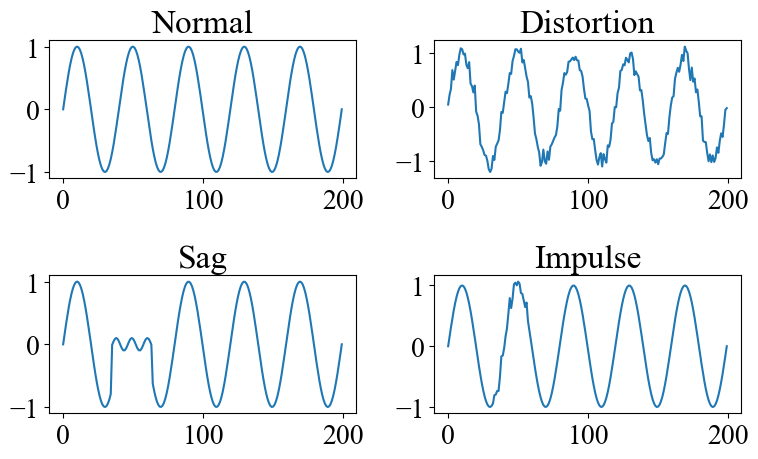

In [17]:
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 20})

x = np.linspace(0 * np.pi, 10 * np.pi, 200)
y = np.sin(x)
signal = y.copy()

anom_signal_dis = voltage_distortion(signal.copy(), level=0.1)
anom_signal_sag = voltage_sag(signal.copy(), level=0.1)
anom_signal_imp = voltage_impulse(signal.copy(), level=0.1)

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
axes[0][0].plot(signal, label='Normal')
axes[0][0].set_title('Normal')
axes[0][1].plot(anom_signal_dis, label='Distortion')
axes[0][1].set_title('Distortion')
axes[1][0].plot(anom_signal_sag, label='Sag')
axes[1][0].set_title('Sag')
axes[1][1].plot(anom_signal_imp, label='Impulse')
axes[1][1].set_title('Impulse')
# plt.show()

plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# Initialize the dataset with the correct shape
length = 200

normal = 4000
sag = 4000
dis = 4000
imp = 4000

dataset = np.zeros((normal + sag + dis + imp, length + 1))

# Generate normal data
for i in range(normal):
    x = np.linspace(0 * np.pi, np.random.uniform(10, 20) * np.pi, length)
    y = np.sin(x)
    y = np.concatenate([y, [0]], axis=0)
    dataset[i] = y

# Generate distorted data
for i in range(normal, normal + dis):
    x = np.linspace(0 * np.pi, np.random.uniform(10, 20) * np.pi, length)
    y = np.sin(x)
    sig = voltage_distortion(y.copy(), level=np.random.uniform(0.1, 0.3))
    sig = np.concatenate([sig, [1]], axis=0)
    dataset[i] = sig.copy()
    
# Generate sag data
for i in range(normal + dis, normal + dis + sag):
    x = np.linspace(0 * np.pi, np.random.uniform(10, 20) * np.pi, length)
    y = np.sin(x)
    sig = voltage_sag(y.copy(), level=np.random.uniform(0.1, 0.3))
    sig = np.concatenate([sig, [2]], axis=0)
    dataset[i] = sig.copy()
    
# Generate impulse data
for i in range(normal + dis + sag, normal + dis + sag + imp):
    x = np.linspace(0 * np.pi, np.random.uniform(10, 20) * np.pi, length)
    y = np.sin(x)
    sig = voltage_impulse(y.copy(), level=np.random.uniform(0.1, 0.3))
    sig = np.concatenate([sig, [3]], axis=0)
    dataset[i] = sig.copy()

# Verify the distribution of labels
labels = dataset[:, -1]
print(f"Number of 0 labels: {np.sum(labels == 0)}")
print(f"Number of 1 labels: {np.sum(labels == 1)}")
print(f"Number of 2 labels: {np.sum(labels == 2)}")
print(f"Number of 3 labels: {np.sum(labels == 3)}")


Number of 0 labels: 4000
Number of 1 labels: 4000
Number of 2 labels: 4000
Number of 3 labels: 4000


In [4]:
df = pd.DataFrame(dataset)
df = df.rename(columns={200: 'label'})
df.to_csv("./datasets/vol_anomaly_llm.csv", index=False)
df = pd.read_csv('./datasets/vol_anomaly_llm.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.0,0.221673,0.432317,0.621449,0.779659,0.899074,0.973754,0.999981,0.976452,0.904336,...,-0.960293,-0.874556,-0.745303,-0.578966,-0.383820,-0.169576,0.053106,0.273145,0.479593,0.0
1,0.0,0.182189,0.358280,0.522378,0.668991,0.793210,0.890878,0.958726,0.994483,0.996950,...,-0.422389,-0.580459,-0.719099,-0.833669,-0.920333,-0.976190,-0.999372,-0.989102,-0.945723,0.0
2,0.0,0.241738,0.469137,0.668708,0.828613,0.939368,0.994402,0.990452,0.927751,0.810019,...,0.470635,0.243384,0.001697,-0.240091,-0.467637,-0.667445,-0.827662,-0.938785,-0.994222,0.0
3,0.0,0.254148,0.491606,0.696781,0.856199,0.959390,0.999580,0.974127,0.884705,0.737184,...,-0.926447,-0.800360,-0.621714,-0.402240,-0.156352,0.099804,0.349406,0.576063,0.764890,0.0
4,0.0,0.271397,0.522422,0.734232,0.890925,0.980742,0.996938,0.938300,0.809227,0.619410,...,0.790570,0.594701,0.354191,0.087094,-0.186541,-0.446173,-0.672314,-0.847986,-0.960005,0.0


In [5]:
df['label'].unique()

array([0., 1., 2., 3.])